In [22]:
primary_filename_a = "Results/results_quesitions_gina_a.txt"
all_filename_a = "Results/results_questions_full_a.txt"

primary_filename_b = "Results/results_questions_gina_b.txt"
all_filename_b = "Results/results_questions_full_b.txt"

In [23]:
import re
import pandas

def extract_choice(filename):
    with open(filename, 'r') as f:
        data = f.read()
        
        # Extract numbers after "choice:" pattern
        question_number = re.findall(r'Question Number: (\d+)', data)
        choice_numbers = re.findall(r'Choice: (\d+)', data)
        
        # Convert extracted strings to integers if needed
        question_number = [int(num) for num in question_number]
        choice_numbers = [int(num) for num in choice_numbers]
        
        print(f"Found {len(question_number)} choices: {question_number}")
        print(f"Found {len(choice_numbers)} choices: {choice_numbers}")

        # Create a DataFrame from the extracted data
        df = pandas.DataFrame({
            'Question': question_number,
            'Choice': choice_numbers
        })

        # Display the first few rows of the DataFrame
        print("\nCreated DataFrame:")
        print(df.head())


        return df



In [24]:
primary_a = extract_choice(primary_filename_a)
all_a = extract_choice(all_filename_a)

primary_b = extract_choice(primary_filename_b)
all_b = extract_choice(all_filename_b)

Found 24 choices: [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70]
Found 24 choices: [2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1]

Created DataFrame:
   Question  Choice
0         1       2
1         4       1
2         7       1
3        10       1
4        13       2
Found 48 choices: [2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 20, 21, 23, 24, 26, 27, 29, 30, 32, 33, 35, 36, 38, 39, 41, 42, 44, 45, 47, 48, 50, 51, 53, 54, 56, 57, 59, 60, 62, 63, 65, 66, 68, 69, 71, 72]
Found 48 choices: [1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 0, 2, 3, 2, 1, 3, 1]

Created DataFrame:
   Question  Choice
0         2       1
1         3       1
2         5       2
3         6       2
4         8       2
Found 24 choices: [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70]
Found 24 choices: [1, 1, 1, 1, 1, 1, 

In [25]:
# Combine primary_a and all_a dataframes
combined_a = pandas.concat([primary_a, all_a])

# Sort the combined dataframe by the Question column
combined_a = combined_a.sort_values(by='Question').reset_index(drop=True)

# Display the result
print("Combined dataframe sorted by Question:")
print(combined_a.head(10))
print(f"Total number of rows: {len(combined_a)}")

Combined dataframe sorted by Question:
   Question  Choice
0         1       2
1         2       1
2         3       1
3         4       1
4         5       2
5         6       2
6         7       1
7         8       2
8         9       1
9        10       1
Total number of rows: 72


In [26]:
# Combine primary_b and all_b dataframes
combined_b = pandas.concat([primary_b, all_b])

# Sort the combined dataframe by the Question column
combined_b = combined_b.sort_values(by='Question').reset_index(drop=True)

# Display the result
print("Combined dataframe sorted by Question:")
print(combined_b.head(10))
print(f"Total number of rows: {len(combined_b)}")

Combined dataframe sorted by Question:
   Question  Choice
0         1       1
1         2       1
2         3       3
3         4       1
4         5       3
5         6       2
6         7       1
7         8       3
8         9       2
9        10       1
Total number of rows: 72


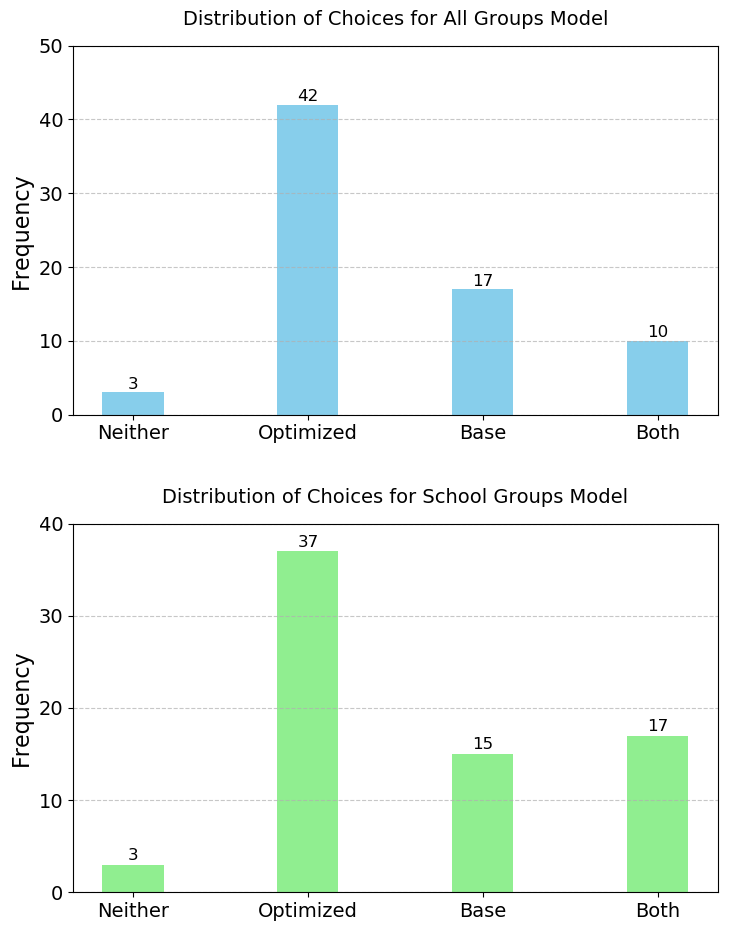

In [27]:
import numpy as np

import matplotlib.pyplot as plt

# Count the frequency of each Choice in both dataframes
choice_counts_a = combined_a['Choice'].value_counts().sort_index()
choice_counts_b = combined_b['Choice'].value_counts().sort_index()

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Define labels for the choices
choice_labels = ["Neither", "Optimized", "Base", "Both"]

# Create an index for the bars
index = np.arange(len(choice_labels))
width = 0.35

# Plot stacked bar for combined_a
ax1.bar(index, choice_counts_a, width, color='skyblue')
ax1.set_title('Distribution of Choices for All Groups Model', fontsize=14, pad=15)
ax1.set_ylabel('Frequency', fontsize=16)
ax1.set_xticks(index)
ax1.set_xticklabels(choice_labels)
# Set y-ticks to every 10
ax1.set_yticks(np.arange(0, max(choice_counts_a) + 10, 10))
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='both', which='major', labelsize=14)

# Add count values on top of each bar
for i, v in enumerate(choice_counts_a):
    ax1.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Plot stacked bar for combined_b
ax2.bar(index, choice_counts_b, width, color='lightgreen')
ax2.set_title('Distribution of Choices for School Groups Model', fontsize=14, pad=15)
ax2.set_ylabel('Frequency', fontsize=16)
ax2.set_xticks(index)
ax2.set_xticklabels(choice_labels)
# Set y-ticks to every 10
ax2.set_yticks(np.arange(0, max(choice_counts_b) + 10, 10))
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Add count values on top of each bar
for i, v in enumerate(choice_counts_b):
    ax2.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Set overall font sizes
plt.rcParams.update({'font.size': 16})

# Adjust layout to make room for the larger text and padding
plt.tight_layout(pad=2.0)


In [28]:
# Extract choices for every third question (starting from 1)
questions_to_extract = list(range(1, 73, 3))  # [1, 4, 7, ..., 70]

# Filter for combined_a
primary_choice_counts_a = combined_a[combined_a['Question'].isin(questions_to_extract)]['Choice'].value_counts().sort_index()

# Filter for combined_b
primary_choice_counts_b = combined_b[combined_b['Question'].isin(questions_to_extract)]['Choice'].value_counts().sort_index()

# Display the results
print("Primary choice counts for Model A:")
print(primary_choice_counts_a)
print("\nPrimary choice counts for Model B:")
print(primary_choice_counts_b)


Primary choice counts for Model A:
0     2
1    17
2     5
Name: Choice, dtype: int64

Primary choice counts for Model B:
1    19
2     5
Name: Choice, dtype: int64


In [29]:
# Extract choices for every third question (starting from 1)
questions_to_extract = list(range(2, 73, 3))  

# Filter for combined_a
middle_choice_counts_a = combined_a[combined_a['Question'].isin(questions_to_extract)]['Choice'].value_counts().sort_index()

# Filter for combined_b
middle_choice_counts_b = combined_b[combined_b['Question'].isin(questions_to_extract)]['Choice'].value_counts().sort_index()

# Display the results
print("Middle choice counts for Model A:")
print(middle_choice_counts_a)
print("\Middle choice counts for Model B:")
print(middle_choice_counts_b)

Middle choice counts for Model A:
1    9
2    9
3    6
Name: Choice, dtype: int64
\Middle choice counts for Model B:
0    2
1    9
2    4
3    9
Name: Choice, dtype: int64


In [30]:
# Extract choices for every third question (starting from 1)
questions_to_extract = list(range(3, 73, 3))  

# Filter for combined_a
high_choice_counts_a = combined_a[combined_a['Question'].isin(questions_to_extract)]['Choice'].value_counts().sort_index()

# Filter for combined_b
high_choice_counts_b = combined_b[combined_b['Question'].isin(questions_to_extract)]['Choice'].value_counts().sort_index()

# Display the results
print("High choice counts for Model A:")
print(high_choice_counts_a)
print("\High choice counts for Model B:")
print(high_choice_counts_b)

High choice counts for Model A:
0     1
1    16
2     3
3     4
Name: Choice, dtype: int64
\High choice counts for Model B:
0    1
1    9
2    6
3    8
Name: Choice, dtype: int64


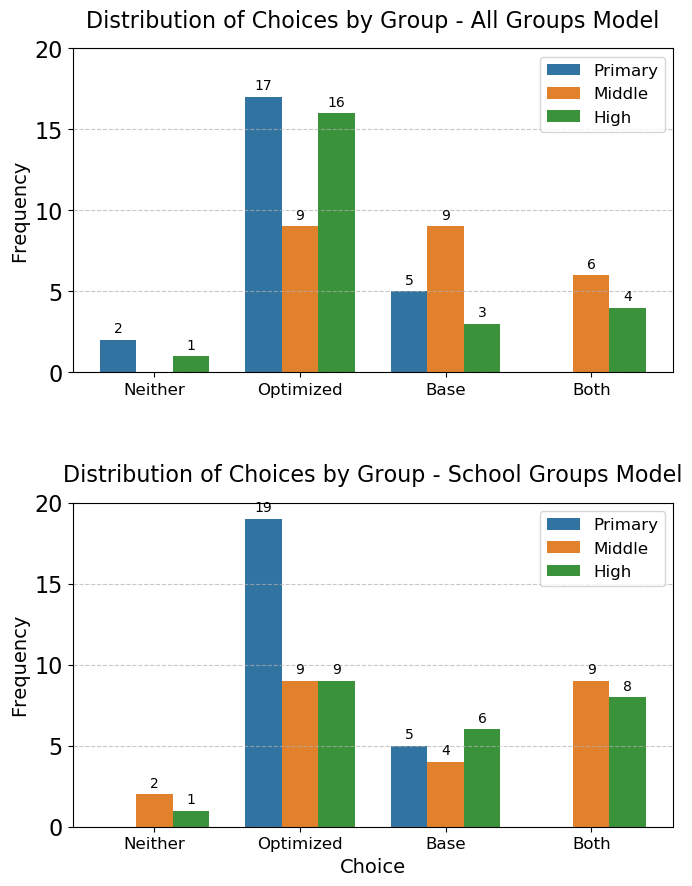

In [31]:
import numpy as np

import matplotlib.pyplot as plt

# Create a figure with two subplots stacked vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Define labels for the choices
choice_labels = ["Neither", "Optimized", "Base", "Both"]

# Set up the positions for the bars
x = np.arange(len(choice_labels))
width = 0.25  # width of the bars

# Prepare data for plotting
# For model A (first subplot)
primary_data_a = [primary_choice_counts_a.get(i, 0) for i in range(4)]
middle_data_a = [middle_choice_counts_a.get(i, 0) for i in range(4)]
high_data_a = [high_choice_counts_a.get(i, 0) for i in range(4)]

# For model B (second subplot)
primary_data_b = [primary_choice_counts_b.get(i, 0) for i in range(4)]
middle_data_b = [middle_choice_counts_b.get(i, 0) for i in range(4)]
high_data_b = [high_choice_counts_b.get(i, 0) for i in range(4)]

# Plot for Model A
rects1_a = ax1.bar(x - width, primary_data_a, width, label='Primary', color='#3274A1')
rects2_a = ax1.bar(x, middle_data_a, width, label='Middle', color='#E1812C')
rects3_a = ax1.bar(x + width, high_data_a, width, label='High', color='#3A923A')

# Plot for Model B
rects1_b = ax2.bar(x - width, primary_data_b, width, label='Primary', color='#3274A1')
rects2_b = ax2.bar(x, middle_data_b, width, label='Middle', color='#E1812C')
rects3_b = ax2.bar(x + width, high_data_b, width, label='High', color='#3A923A')

# Add labels, title and legend to Model A plot
ax1.set_title('Distribution of Choices by Group - All Groups Model', fontsize=16, pad=15)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_xticks(x)
ax1.set_yticks(np.arange(0, 25, 5))
ax1.set_xticklabels(choice_labels, fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar for Model A
def add_labels(rects, ax):
    for rect in rects:
        height = rect.get_height()
        if height > 0:  # Only add label if there's a value
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=10)

add_labels(rects1_a, ax1)
add_labels(rects2_a, ax1)
add_labels(rects3_a, ax1)

# Add labels, title and legend to Model B plot
ax2.set_title('Distribution of Choices by Group - School Groups Model', fontsize=16, pad=15)
ax2.set_ylabel('Frequency', fontsize=14)
ax2.set_xlabel('Choice', fontsize=14)
ax2.set_xticks(x)
ax2.set_yticks(np.arange(0, 25, 5))
ax2.set_xticklabels(choice_labels, fontsize=12)
ax2.legend(fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar for Model B
add_labels(rects1_b, ax2)
add_labels(rects2_b, ax2)
add_labels(rects3_b, ax2)

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()